## Task-D: Collinear features and their effect on linear models

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r'C:\Users\NADEEM\Music\Applied course\Module Notes\Assign Imp Doc\10 Behaviour of linear model\task_d.csv')

In [4]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [5]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

## Task: D(i)  Logistic Regression

### Finding the Correlation between the features

                  x         y         z       x*x       2*y  2*z+3*x*x  \
x          1.000000 -0.205926  0.812458  0.997947 -0.205926   0.996252   
y         -0.205926  1.000000 -0.602663 -0.209289  1.000000  -0.261123   
z          0.812458 -0.602663  1.000000  0.807137 -0.602663   0.847163   
x*x        0.997947 -0.209289  0.807137  1.000000 -0.209289   0.997457   
2*y       -0.205926  1.000000 -0.602663 -0.209289  1.000000  -0.261123   
2*z+3*x*x  0.996252 -0.261123  0.847163  0.997457 -0.261123   1.000000   
w          0.583277 -0.401790  0.674486  0.583803 -0.401790   0.606860   
target     0.728290 -0.690684  0.969990  0.719570 -0.690684   0.764729   

                  w    target  
x          0.583277  0.728290  
y         -0.401790 -0.690684  
z          0.674486  0.969990  
x*x        0.583803  0.719570  
2*y       -0.401790 -0.690684  
2*z+3*x*x  0.606860  0.764729  
w          1.000000  0.641750  
target     0.641750  1.000000  


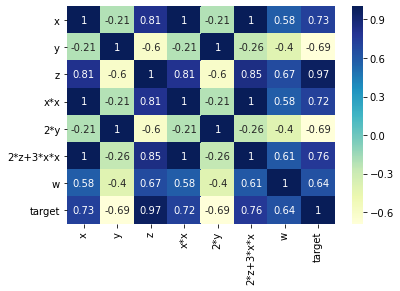

In [6]:
print(data.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

### Finding the best model for the given data

In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,Y)

LogisticRegression()

In [8]:
alpha= np.logspace(-5, 4, num=10)
param_grid={'C':alpha}

#logistic = linear_model.LogisticRegression()
model = GridSearchCV(model, param_grid, cv=5 )
model.fit(X, Y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04])})

In [9]:
model.best_params_

{'C': 1e-05}

### Getting the weights with the original data

In [10]:
best_model = LogisticRegression(C= 1e-05)
best_model.fit(X, Y)

LogisticRegression(C=1e-05)

In [11]:
pred = best_model.predict(X)

In [12]:
best_model_accuracy = best_model.score(X, Y)
print(best_model_accuracy)

1.0


In [13]:
W = best_model.coef_
print(W)

[[ 0.00036369 -0.000345    0.00048449  0.00035933 -0.000345    0.00038189
   0.00032048]]


### Modifying original data

In [14]:
X_N = X + 0.01
best_model.fit(X_N,Y)

LogisticRegression(C=1e-05)

In [15]:
best_model_accuracy_edited = best_model.score(X_N, Y)
print(best_model_accuracy_edited)

1.0


In [16]:
W_ = best_model.coef_
print(W_)

[[ 0.00036369 -0.000345    0.00048449  0.00035933 -0.000345    0.00038189
   0.00032048]]


 ### Checking deviations in metric and weights 

In [17]:
#difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
print(best_model_accuracy - best_model_accuracy_edited)

0.0


In [18]:
Change = abs((W - W_))[0]
print(Change)

[3.04544419e-11 3.04711950e-11 3.04588067e-11 3.04540617e-11
 3.04711950e-11 3.04543615e-11 3.04569679e-11]


In [19]:
print(len(data.columns)-1)

7


In [20]:
import numpy as np
coefs=best_model.coef_[0]
top_three = np.argpartition(coefs, -4)[-4:]
top_three_sorted=top_three[np.argsort(coefs[top_three])]
print(data.columns[top_three_sorted])

Index(['x*x', 'x', '2*z+3*x*x', 'z'], dtype='object')


## Task: D(ii)  Linear SVM

### Finding the best model for the given data

In [21]:
from sklearn import svm
sv = svm.SVC(kernel="linear")
sv.fit(X, Y)

SVC(kernel='linear')

In [22]:
alpha= np.logspace(-5, 4, num=10)
param_grid={'C':alpha}

#logistic = linear_model.LogisticRegression()
model1 = GridSearchCV(sv, param_grid, cv=5 )
model1.fit(X, Y)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04])})

In [23]:
model1.best_params_

{'C': 0.01}

### Getting the weights with the original data

In [24]:
best_model = svm.SVC(kernel="linear", C=0.01)
best_model.fit(X, Y)

SVC(C=0.01, kernel='linear')

In [25]:
pred = best_model.predict(X)

In [26]:
best_model_accuracy = best_model.score(X, Y)
print(best_model_accuracy)

1.0


In [27]:
W = best_model.coef_
print(W)

[[ 0.16231443 -0.21809058  0.35982752  0.15193189 -0.21809058  0.18018286
   0.1470533 ]]


### Modifying original data

In [28]:
X_N = X + 0.01
best_model.fit(X_N,Y)

SVC(C=0.01, kernel='linear')

In [29]:
best_model_accuracy_edited = best_model.score(X_N, Y)
print(best_model_accuracy_edited)

1.0


In [30]:
W_ = best_model.coef_
print(W_)

[[ 0.16231442 -0.21809059  0.35982752  0.15193189 -0.21809059  0.18018286
   0.14705329]]


### Checking deviations in metric and weights 

In [31]:
#difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
print(best_model_accuracy - best_model_accuracy_edited)

0.0


In [32]:
Change = abs((W - W_))[0]
print(Change)

[1.48646107e-09 2.62874922e-09 1.31725930e-09 1.37899120e-09
 2.62874933e-09 1.40014039e-09 3.55973501e-09]


In [33]:
import numpy as np
coefs=best_model.coef_[0]
top_three = np.argpartition(coefs, -4)[-4:]
#top_three_sorted=top_three[np.argsort(coefs[top_three])]
print(data.columns[top_three])

Index(['x*x', 'z', '2*z+3*x*x', 'x'], dtype='object')


#### OBSERVATION:

1. Correlation Matrix are showing high correlation between the independent features.
2. Differnce between the modifying weight and the original weight is not high.
3. After doing Perturbation Test, Less differnce in weight shows there is no collinearity difference in features.
4. Top 4 features which have higher % change in weights compare to the other feature have high corelation.
